# **Clustering Analysis**

###**Case Study Data Mining and Business Intelligence**

##**Load Package**

In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
import warnings; warnings.simplefilter('ignore')

try:
    import google.colab; IN_COLAB = True
    !pip install umap-learn
    !wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-10-07 08:43:21--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.4’

tau_unsup.py.4      100%[===================>]  16.98K  --.-KB/s    in 0s      

2022-10-07 08:43:22 (36.6 MB/s) - ‘tau_unsup.py.4’ saved [17387/17387]



In [ ]:
# Importing Modules untuk Notebook ini
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)
random_state = 99

##**Load Data**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ammardaffa/Data-Mining-2/main/Case-Study-02-MixITup.csv', sep=';')

In [ ]:
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0


##**Data Cleaning**

Dari dalam data, didapati beberapa variabel yang tidak bertipe sesuai dengan yang dibutuhkan, terdapat salah input, missing-value, maupun di luar skala yang ada, seperti FavFlavor tipe 9 (tidak ada rasa tipe 9), kota JJakarta, umur 35', dan lainnya. Sehingga, dilakukan data cleaning terlebih dahulu sebelum dilanjutkan ke visualisasi data.

In [ ]:
# Karena dirasa tidak dibutuhkan, kami menghapus kolom ID
df = df.drop(labels='ID', axis=1)

In [ ]:
#membuat data pendapatan menjadi tipe float dengan langkah berikut
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('Rp', ' ', regex=True) #men-drop Rp dari data
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace(',', ' ', regex=True) #menghilangkan , dari data
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace(' ', '', regex=True) #menghilangkan spasi dari data
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype(float) #membuat data ber-tipe float

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].str.replace('-','Wanita', regex=True) #mengganti data - dengan modus dari data Jenis Kelamin (Wanita)
df['skor-pengeluaran'] = df['skor-pengeluaran'].replace({101:100}) #mengganti nilai skor pengeluaran 101 karena berada di luar skala, menjadi 100
df['FavFlavor'] = df['FavFlavor'].replace({9:8})
df['Umur'] = df['Umur'].str.replace("35'","35", regex=True) #mengganti umur 35' menjadi 35 (menghilangkan tanda petik)
df['Kota'] = df['Kota'].str.replace('JJakarta','Jakarta', regex=True) #mengganti typo JJakarta menjadi Jakarta

In [ ]:
# Mencetak ukuran data
print(df.shape)
# Mengecek apakah terdapat duplikasi dalam data
df.duplicated().sum()

(200, 9)


0

In [ ]:
# mengecek berapa banyak missing value dalam setiap variabel
df.isnull().sum()

Jenis Kelamin            4
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 12
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64

In [ ]:
#memnbuat masing-masing variabel menjadi tipe yang sesuai
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category') #membuat variabel Jenis Kelamin bertipe Kategori
df['Umur'] = df['Umur'].astype('float') #membuat variabel Umur bertipe Float
df['Menikah'] = df['Menikah'].astype('category') #membuat variabel Menikah bertipe Kategori
df['Kota'] = df['Kota'].astype('category') #membuat variabel Kota bertipe Kategori
df['HariFav'] = df['HariFav'].astype('category') #membuat variabel HariFav bertipe Kategori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         196 non-null    category
 1   Umur                  200 non-null    float64 
 2   Pendapatan-per-bulan  200 non-null    float64 
 3   skor-pengeluaran      200 non-null    int64   
 4   Menikah               188 non-null    category
 5   Kota                  200 non-null    category
 6   Promo                 194 non-null    float64 
 7   HariFav               200 non-null    category
 8   FavFlavor             200 non-null    int64   
dtypes: category(4), float64(3), int64(2)
memory usage: 9.5 KB


Umur                       AxesSubplot(0.125,0.71587;0.168478x0.16413)
Pendapatan-per-bulan    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
skor-pengeluaran        AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Promo                   AxesSubplot(0.731522,0.71587;0.168478x0.16413)
FavFlavor                 AxesSubplot(0.125,0.518913;0.168478x0.16413)
dtype: object

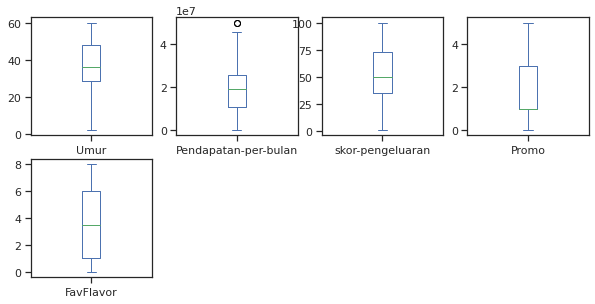

In [ ]:
df.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10)) #Mengecek data outliers variabel tertentu

In [ ]:
# mengisi data yang kosong pada kolom menikah, jenis kelamin, dan promo berdasarkan modus masing-masingnya
modus1 = df['Menikah'].mode()[0]
df['Menikah'] = df['Menikah'].fillna(modus1)

modus2 = df['Jenis Kelamin'].mode()[0]
df['Jenis Kelamin'] = df['Jenis Kelamin'].fillna(modus2)

modus3 = df['Promo'].mode()[0]
df['Promo'] = df['Promo'].fillna(modus3)

##**Scaling**

Karena variabel Pendapatan memiliki nilai jutaan, yang amat berbeda dengan variabel lainnya, maka dilakukan scaling untuk membuat variabel Pendapatan menyerupai variabel lainnya dan hasil pengolahan data dapat lebih akurat dalam menggambaran keadaan sesungguhnya.

In [ ]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df['Pendapatan-per-bulan'].values.reshape(-1,1))
print(scaled)

[[-0.51757743]
 [ 1.39089401]
 [-0.25039147]
 [-0.55574685]
 [ 0.13130286]
 [ 0.97103026]
 [ 0.24581113]
 [-1.54815204]
 [-0.479408  ]
 [ 0.05496401]
 [-0.67025521]
 [ 1.00919968]
 [ 1.42906343]
 [-1.16645781]
 [-1.54815204]
 [-0.63208579]
 [ 0.66567488]
 [ 0.58933603]
 [-1.24279665]
 [-0.8229329 ]
 [-1.54815204]
 [-0.479408  ]
 [-0.67025521]
 [ 0.47482767]
 [ 0.39848882]
 [-0.25039147]
 [-1.62449088]
 [-0.25039147]
 [-0.89927175]
 [ 0.66567488]
 [-0.86110233]
 [ 1.04736911]
 [ 0.93286084]
 [ 0.24581113]
 [ 0.05496401]
 [ 0.78018315]
 [-0.02137493]
 [ 0.66567488]
 [-0.02137493]
 [ 0.09313344]
 [-1.54815204]
 [-0.70842464]
 [ 0.66567488]
 [ 1.39089401]
 [ 1.61991055]
 [-0.25039147]
 [ 0.16947228]
 [ 1.00919968]
 [-0.02137493]
 [-0.09771377]
 [ 0.05496401]
 [-1.70082973]
 [ 0.16947228]
 [ 0.62750545]
 [-0.67025521]
 [-1.58632146]
 [ 0.09313344]
 [-1.20462723]
 [ 1.46723285]
 [-0.8229329 ]
 [-0.78476348]
 [ 0.09313344]
 [-0.55574685]
 [-0.51757743]
 [-0.78476348]
 [-0.25039147]
 [ 2.91767

##**Encoding**

Karena terdapat banyak variabel kategorik yang tidak dilabelkan dengan angka (Kota dan HariFav), maka dilakukan encoding (men-transform data untuk nilai numerik) terhadap kedua variabel.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["code_kota"] = ord_enc.fit_transform(df[["Kota"]])
df[["Kota", "code_kota"]].head(11)

,Kota,code_kota
0,Jakarta,1.0
1,Depok,0.0
2,Jakarta,1.0
3,Jakarta,1.0
4,Jakarta,1.0
5,Depok,0.0
6,Jakarta,1.0
7,Depok,0.0
8,Jakarta,1.0
9,Jakarta,1.0


In [ ]:
df["code_hari"] = ord_enc.fit_transform(df[["HariFav"]])
df[["HariFav", "code_hari"]].head(11)

,HariFav,code_hari
0,Sabtu,4.0
1,Minggu,2.0
2,Minggu,2.0
3,Rabu,3.0
4,Senin,6.0
5,Senin,6.0
6,Senin,6.0
7,Senin,6.0
8,Selasa,5.0
9,Senin,6.0


In [ ]:
df["code_jk"] = ord_enc.fit_transform(df[["Jenis Kelamin"]])
df[["Jenis Kelamin", "code_jk"]].head(11)

,Jenis Kelamin,code_jk
0,Wanita,1.0
1,Wanita,1.0
2,Pria,0.0
3,Pria,0.0
4,Wanita,1.0
5,Wanita,1.0
6,Pria,0.0
7,Wanita,1.0
8,Wanita,1.0
9,Wanita,1.0


In [ ]:
df2 = df.drop(['Jenis Kelamin', 'Kota', 'HariFav','Menikah'], axis=1)
#Drop kolom yang sudah ada code
#Kami men-drop kolom menikah karena menurut kami kurang relevan

**Keterangan Kode**

Kode Kota:
*   0=Jakarta
* 1=Depok
* 2=Tangerang

Kode Hari:
* 0= Jumat
* 1= Kamis
* 2= Minggu
* 3= Rabu
* 4= Sabtu
* 5= Selasa
* 6= Senin


##**Clustering**

Text(0.5, 1.0, 'Elbow curve')

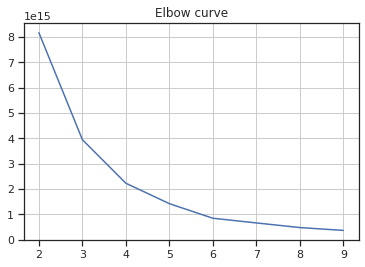

In [ ]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(df2)
    distorsions.append(kmeans.inertia_)
#fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

array([8, 5, 8, 8, 0, 2, 0, 7, 8, 0], dtype=int32)

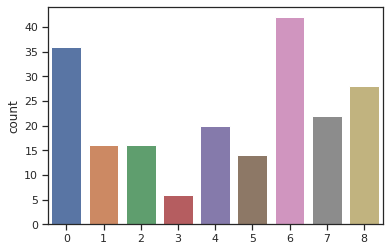

In [ ]:
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(df2)
C_kmpp = kmPP.predict(df2)

sns.countplot(C_kmpp)
C_kmpp[:10]

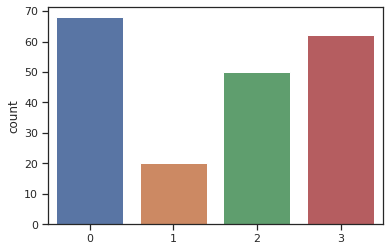

In [ ]:
k = 4
km = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001,
                    random_state = 0)
km.fit(df2)
# Hasil clusteringnya
C_km = km.predict(df2)
p= sns.countplot(C_km)

In [ ]:
C_km

array([0, 1, 0, 0, 0, 3, 3, 2, 0, 0, 0, 3, 1, 2, 2, 0, 3, 3, 2, 2, 2, 0,
       0, 3, 3, 0, 2, 0, 2, 3, 2, 3, 3, 3, 0, 3, 0, 3, 0, 0, 2, 0, 3, 1,
       1, 0, 0, 3, 0, 0, 0, 2, 0, 3, 0, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0,
       1, 0, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 3, 2, 3, 0, 3, 3, 2, 0, 2, 3,
       0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 2, 0, 3, 1, 0, 2, 2, 2, 0, 0, 2,
       2, 3, 0, 2, 0, 3, 0, 0, 1, 0, 2, 0, 1, 3, 1, 2, 0, 0, 3, 0, 3, 2,
       2, 3, 2, 0, 3, 3, 0, 2, 3, 3, 2, 3, 3, 3, 0, 0, 2, 3, 3, 1, 3, 0,
       3, 2, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 3, 3, 0, 1, 0, 3, 0, 0, 1, 3,
       3, 2, 0, 3, 3, 3, 1, 2, 1, 2, 2, 2, 0, 0, 3, 2, 3, 0, 2, 2, 0, 1,
       2, 2], dtype=int32)

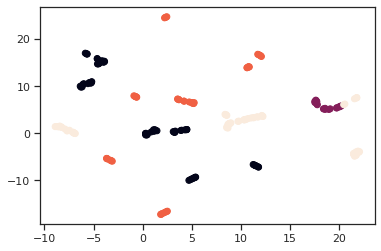

In [ ]:
df3 = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=random_state).fit_transform(df2)
fig, ax = plt.subplots()
ax.scatter(df3[:,0], df3[:,1], c=C_km)
plt.show()

In [ ]:
km.inertia_

2230266184785285.5

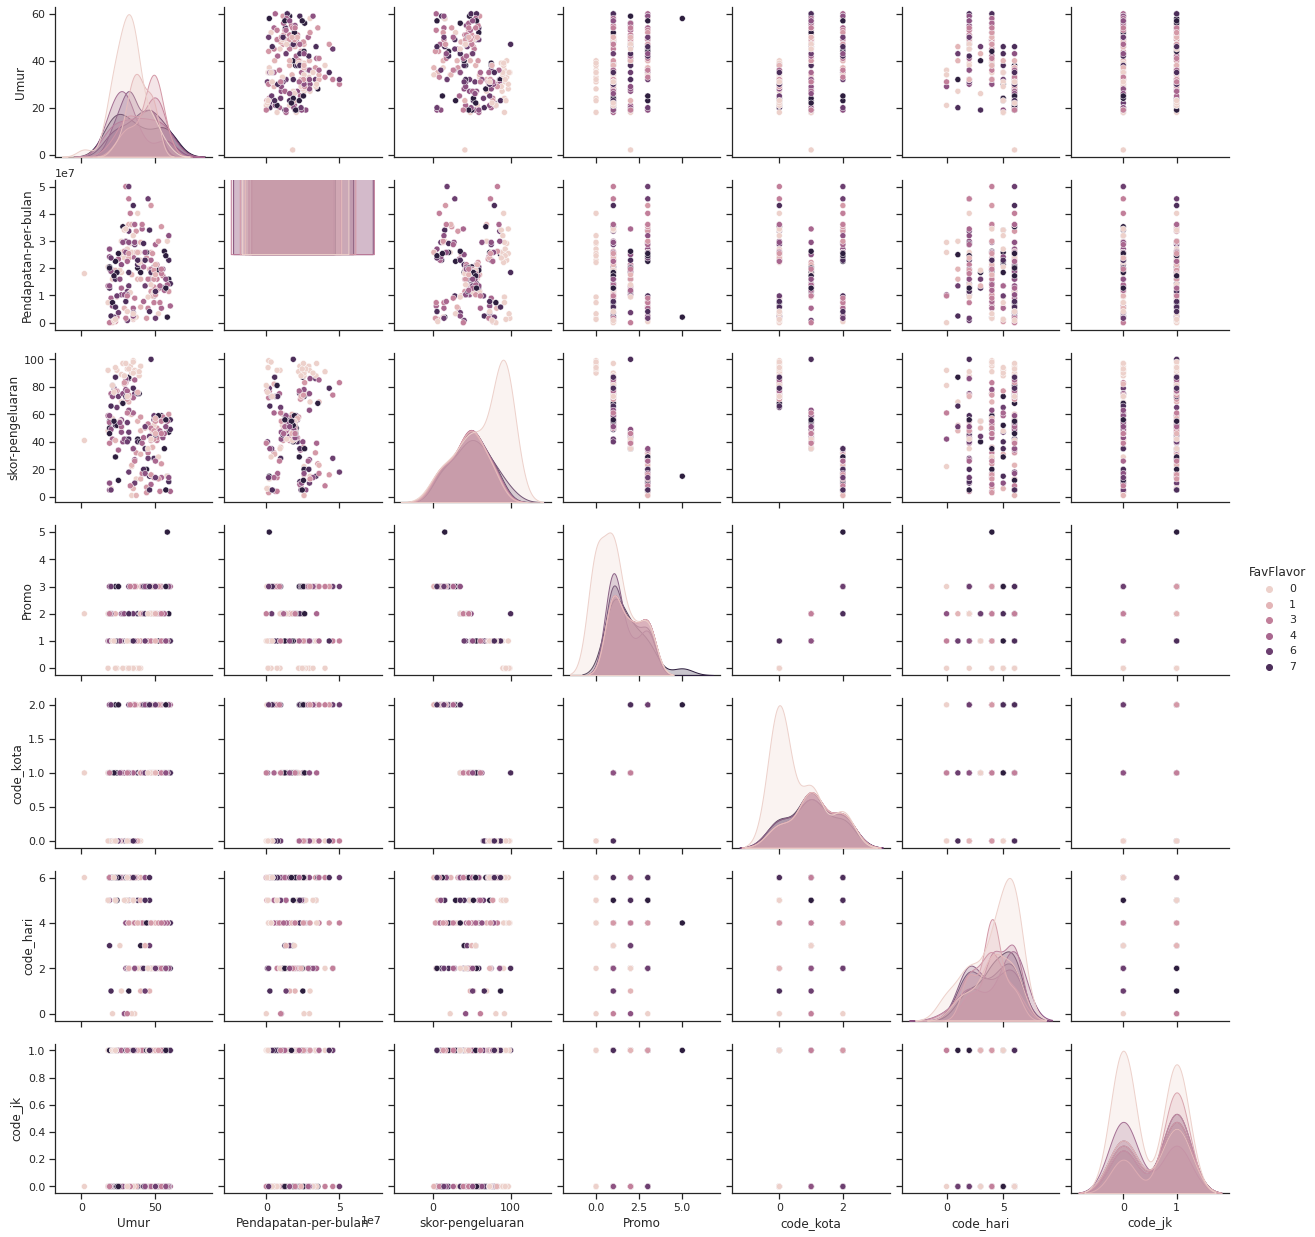

In [ ]:
g = sns.pairplot(df2, hue="FavFlavor")

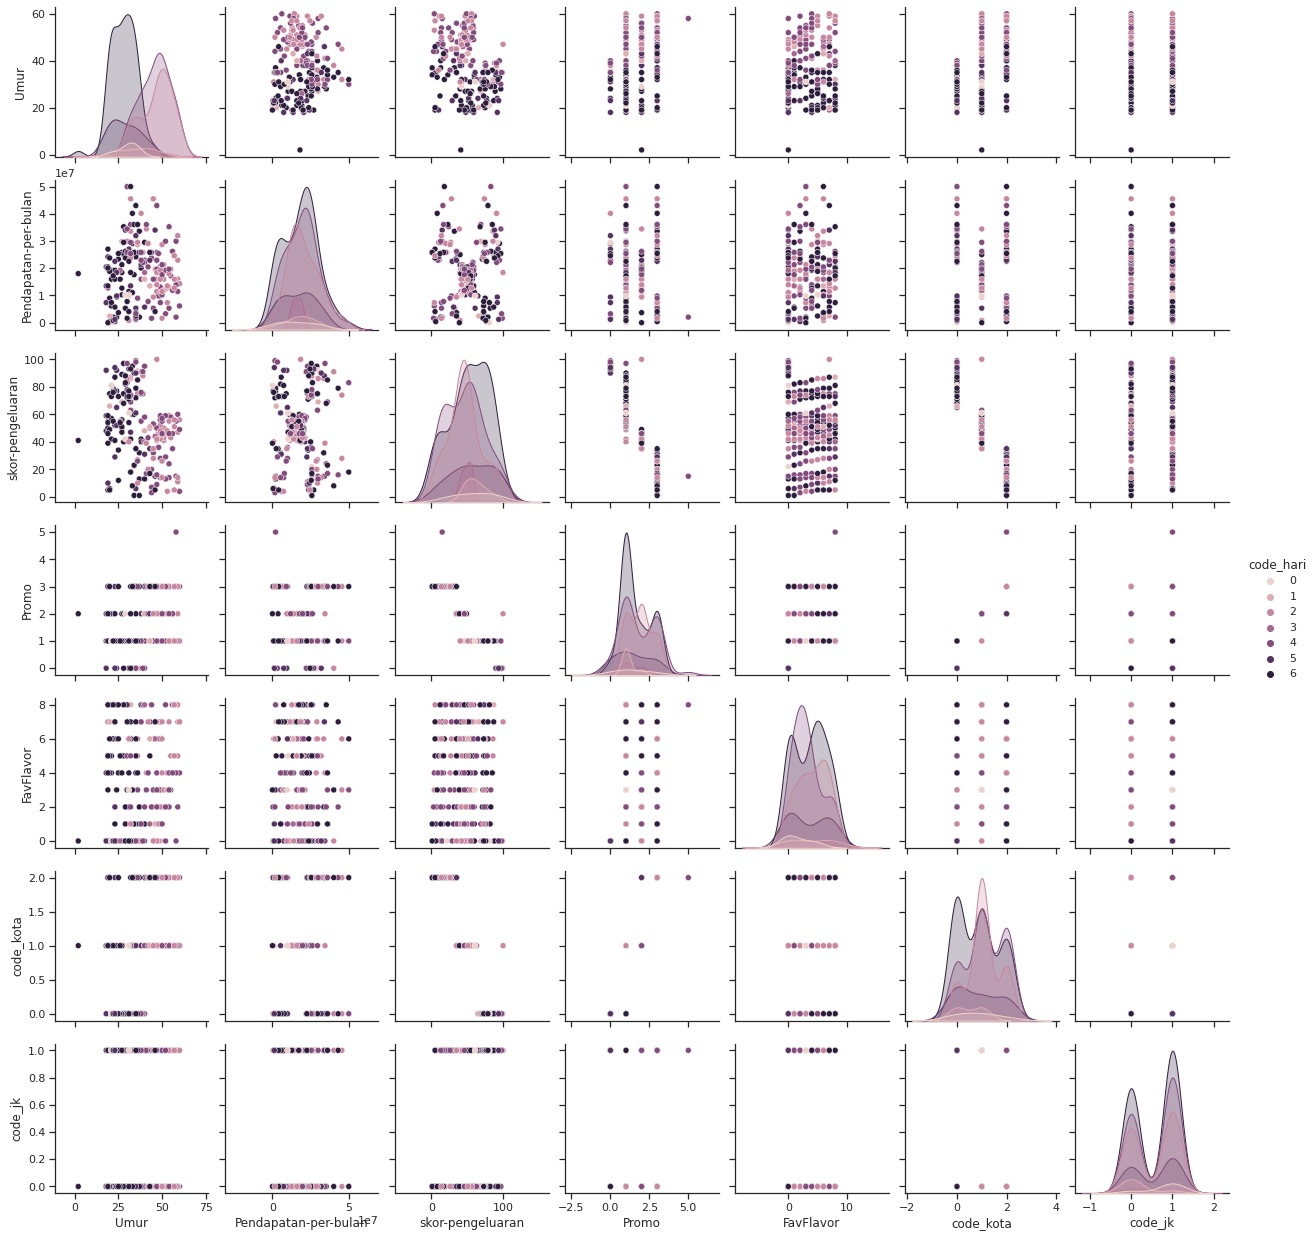

In [ ]:
h = sns.pairplot(df2, hue="code_hari")

##**Insight and Recommendation**

**Analisis penjualan eskrim di setiap cabang**

In [ ]:
import plotly.express as px
fig1 = px.bar(df.groupby(
    'Kota', as_index=False)['skor-pengeluaran'].max().sort_values(
    by='skor-pengeluaran', ascending=False).head(10), x='Kota',
              y='skor-pengeluaran', color='Kota',
              labels={'Kota':'Kota',
                      'skor-pengeluaran':'skor-pengeluaran'},
              template='ggplot2', text='skor-pengeluaran',
              title='<b> Penjualan Ice Cream di setiap cabang')
fig1.show()

Melalui plot yang didapatkan dari skor pengeluaran antara Kota Jakarta, Kota Tangerang, dan Kota Depok, dapat dilihat bahwa skor pengeluaran customer dari Kota Jakarta adalah yang paling tinggi, yaitu dengan skor pengeluaran tertingginya mencapai 100, lalu diikuti oleh Kota Depok dengan skor pengeluaran tertingginya adalah 99, dan yang paling rendah adalah Kota Tangerang dengan skor pengeluaran tertingginya hanya sebesar 35. Customer dari Kota Jakarta adalah yang paling sering membeli Ice Cream di setiap cabang MixITup.

In [ ]:
fig2 = px.pie(
    df.groupby('FavFlavor',
                 as_index=False)['skor-pengeluaran'].count().sort_values(
        by='skor-pengeluaran', ascending=False).head(10),
    names='FavFlavor', values='skor-pengeluaran',
    color='FavFlavor', hole=0.7,
    labels={'skor-pengeluaran':'skor-pengeluaran',
            'skor-pengeluaran':'count'}, template='ggplot2',
    title='<b>Rasa Paling Diminati')
fig2.update_layout(title_x=0.5,
                   legend=dict(orientation='h', yanchor='bottom',
                               y=1.02, xanchor='right', x=1))

Dibuat pie chart untuk memvisualisasikan penyebaran rasa yang terjual. Didapati bahwa rasa Vanilla merupakan best seller dengan banyak penjualan 40 buah. Walaupun ia menjadi rasa best seller, namun ia hanya mencangkup 20% dari penjualan. Sehingga ia tidak terlalu mendominasi penjualan. Sedangkan untuk 8 rasa lainnya, penjualan tersebar secara rata dengan masing-masing rasa terjual sebanyak 20 buah.

Dari hasil, saran yang dapat diberikan adalah dengan menambah stok untuk rasa Vanilla. Selain itu, untuk menyebarluaskan rasa lainnya, dapat membuat promo yang mengkhususkan rasa selain Vanilla. Promo lebih juga dapat diberikan untuk cabang di lokasi Tanggerang.

**Analisis variasi rasa yang diminati pada setiap harinya**

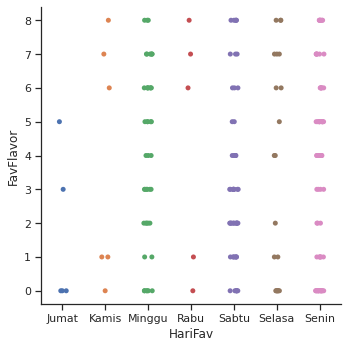

In [ ]:
p= sns.catplot(x="HariFav", y="FavFlavor", data=df)

Pada hari rabu, kamis, dan jumat, variasi rasa yang terjual kurang beragam.

Saran: Berikan promo pada rasa es krim yang kurang terjual di hari rabu, kamis, dan jumat.